# 4. Termdocument Matrix 

## 테크 크런치에서 10페이지의 기사 읽어오기 

In [1]:
import requests
import lxml.html
import numpy as np 

## 기사 목록 가져오는 함수 만들기

### 페이지 넘기기 

In [2]:
page = 2
url = 'https://techcrunch.com/startups/page/{number}'.format(number=page)

In [3]:
url

'https://techcrunch.com/startups/page/2'

 - python 3.6 부터는 다음 문법도 가능하다.
  - f'https://techcrunch.com/startups/page/{page}'

In [6]:
def get_tc_list(page):
    url = 'https://techcrunch.com/startups/page/{number}'.format(number=page)
    res = requests.get(url) # 기사 목록 가지고오기
    root = lxml.html.fromstring(res.text) # 제목 가지고오기
    titles = root.cssselect('h2 a') # 제목 가지고 오기
    for title in titles:
        yield  title.text

In [7]:
get_tc_list(1)

<generator object get_tc_list at 0x000002B3D8941AF0>

## 제네레이터(Generator)란?
 - 리스트를 생성(Generator)하는 함수.list(gen)나 for x in gen 형태로 쓴다. yield 하는 지점에서 한 원소씩 돌려줌. 

In [8]:
list(get_tc_list(1))

['Columbus welcomes urban problem solvers with new\xa0accelerator',
 'Equity crowdfunding platform Seedrs to launch secondary\xa0market',
 'Garena rebrands to Sea and raises $550 million more to focus on Indonesian\xa0e-commerce',
 'Cornershop, a grocery-delivery app in Chile and Mexico, raises\xa0$21M',
 '“The Handmaid’s Tale” is critical to the success of Hulu’s Live TV\xa0service',
 'Urban-X’s investors showcase features high-tech face masks, navigation for the blind and\xa0more',
 'Germany’s Duolingo competitor Babbel sets its sights on the\xa0US',
 'Inside Andy Rubin’s futuristic Playground hardware\xa0incubator',
 'Fortem raises $5.5 million to hunt and take down unwanted\xa0drones',
 'Baby tech draws seed funding and a few big\xa0rounds',
 'Made In Space reveals the Archinaut, a robot-operated factory in the\xa0sky',
 'Growlabs nabs $2.2M to automate outbound\xa0sales',
 'Scan these new QR-style Spotify Codes to instantly play a\xa0song',
 'Equity podcast: Sequoia’s Roelof Botha

 - "\xa"는 표시가 나온다 => 특수 문자, 16진수 \xa0 > 공백이다. 
  - jupyter notebook with R 에서 나오던 문제점이었다. 
  - nbsp -> Non Breakable Space 

In [9]:
def infinite():
    i = 0 
    while True:
        yield i
        i += 1

In [10]:
infinite() # 한번 실행하고 양보하고 부를때마다 수행하고 양보하는 형태다. list.append를 하게 되면 무한히 수행된다. 

<generator object infinite at 0x000002B3D8941A40>

In [11]:
infinite()

<generator object infinite at 0x000002B3D89790A0>

In [12]:
for x in infinite():
    if x > 5: # 5까지만 수행되고 그만된다. 
        break
    print(x)

0
1
2
3
4
5


## TQDM 
 - 진행막대(Progress Bar)를 보여주는 라이브러리 
 - pip install tqdm으로 설치.

In [13]:
import tqdm

## 기사 수집.

In [14]:
articles = []
for page in tqdm.tqdm_notebook(range(1,30)):
    articles = articles + list(get_tc_list(page))

In [15]:
len(articles)

580

In [16]:
articles[:5]

['Columbus welcomes urban problem solvers with new\xa0accelerator',
 'Equity crowdfunding platform Seedrs to launch secondary\xa0market',
 'Garena rebrands to Sea and raises $550 million more to focus on Indonesian\xa0e-commerce',
 'Cornershop, a grocery-delivery app in Chile and Mexico, raises\xa0$21M',
 '“The Handmaid’s Tale” is critical to the success of Hulu’s Live TV\xa0service']

## TDM

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

 - 최대 Features수  : 단어가 최대 1000개 
 - stop_words : am, is, have 와 같은 단어를 제거 

In [18]:
cv = CountVectorizer(max_features=1000, stop_words='english') 

In [19]:
tdm = cv.fit_transform(articles)

In [20]:
tdm # 580문서에서 1000개의 단어.

<580x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3107 stored elements in Compressed Sparse Row format>

In [21]:
words = cv.get_feature_names()

In [26]:
str(words[:15])

"['000', '10', '100m', '10m', '11', '12', '15', '15m', '17', '170m', '18', '1m', '20', '2017', '21']"

In [28]:
m = np.array([[1,2,3],[4,5,6]]) 
m

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
m.sum(axis=0) # 각 열의 합, 열의 크기에 맞게.

array([5, 7, 9])

In [30]:
m.sum(axis=1) # 각 행의 합 행의 크기에 맞게.

array([ 6, 15])

In [33]:
count_mat = tdm.sum(axis=0) # 열합계. 

위를 보면  000 은 5번,10도 3번, 100m도 3번 사용 되었다.

In [35]:
count_mat

matrix([[ 5,  3,  3,  7,  2,  3,  3,  5,  2,  2,  2,  3,  2,  8,  2,  2,  3,
          3,  4,  2,  2, 11,  2,  6,  6,  2,  2, 11,  4,  2,  3,  2,  4, 11,
          4,  2,  2,  2, 20,  2,  4,  4,  2,  8,  3,  2,  3,  2, 22,  6,  2,
          5,  2,  2,  2,  2,  3,  2,  2,  3, 50,  7,  2,  2,  2,  2,  2,  2,
          2,  2,  4,  2,  3,  2,  2,  4,  4,  2,  7,  3, 12,  2,  2,  2,  2,
          7,  2,  2,  8,  2,  3,  3,  2,  3,  2,  2,  2,  2,  5,  2,  2,  2,
          8,  4,  6,  6,  2,  9,  3,  3,  6,  2,  3,  2,  2,  2,  2,  2,  7,
          7,  2,  3,  6,  2,  2,  7,  3,  2,  5,  2,  2,  3,  3, 11,  2,  2,
          2,  2,  2,  2,  2,  2,  3,  5,  7,  3,  2,  3,  9, 18,  2,  3,  3,
          2,  3,  2,  5,  2,  3,  2,  3,  2,  2,  2,  2,  6,  5,  2,  3,  3,
          4, 21,  3,  2,  7,  2,  2,  3,  2,  2,  2,  3,  8,  6,  6, 10,  2,
          2,  3,  2,  2, 12,  4, 16,  2,  2,  3,  2,  2,  2,  2,  3,  4,  5,
          6,  2,  2,  3,  5,  3,  2,  2,  2,  2,  3, 10,  2,  2,  2,  3,  3,

 - Matrix가 대괄호가 2개다. 하나짜리로 변환 해줘야된다. 

In [36]:
import numpy as np 

In [37]:
count = np.squeeze(np.asarray(count_mat)) # 2개 짜리 메트릭스를 1개짜리로 변환 np.asarry() : Matrix to Array

In [39]:
len(count) # 1000개의 단어의 합이므로 1x1000 배열이 출력이 되도록한다.

1000

In [38]:
count

array([ 5,  3,  3,  7,  2,  3,  3,  5,  2,  2,  2,  3,  2,  8,  2,  2,  3,
        3,  4,  2,  2, 11,  2,  6,  6,  2,  2, 11,  4,  2,  3,  2,  4, 11,
        4,  2,  2,  2, 20,  2,  4,  4,  2,  8,  3,  2,  3,  2, 22,  6,  2,
        5,  2,  2,  2,  2,  3,  2,  2,  3, 50,  7,  2,  2,  2,  2,  2,  2,
        2,  2,  4,  2,  3,  2,  2,  4,  4,  2,  7,  3, 12,  2,  2,  2,  2,
        7,  2,  2,  8,  2,  3,  3,  2,  3,  2,  2,  2,  2,  5,  2,  2,  2,
        8,  4,  6,  6,  2,  9,  3,  3,  6,  2,  3,  2,  2,  2,  2,  2,  7,
        7,  2,  3,  6,  2,  2,  7,  3,  2,  5,  2,  2,  3,  3, 11,  2,  2,
        2,  2,  2,  2,  2,  2,  3,  5,  7,  3,  2,  3,  9, 18,  2,  3,  3,
        2,  3,  2,  5,  2,  3,  2,  3,  2,  2,  2,  2,  6,  5,  2,  3,  3,
        4, 21,  3,  2,  7,  2,  2,  3,  2,  2,  2,  3,  8,  6,  6, 10,  2,
        2,  3,  2,  2, 12,  4, 16,  2,  2,  3,  2,  2,  2,  2,  3,  4,  5,
        6,  2,  2,  3,  5,  3,  2,  2,  2,  2,  3, 10,  2,  2,  2,  3,  3,
        2,  2,  6,  2,  2

In [40]:
word_count = list(zip(words,count)) #짝을 지어서 List로 변환. zip도 yield를 사용하고 있어서 list로 호출해줘야된다. 

In [42]:
str(word_count[:10])

"[('000', 5), ('10', 3), ('100m', 3), ('10m', 7), ('11', 2), ('12', 3), ('15', 3), ('15m', 5), ('17', 2), ('170m', 2)]"

In [43]:
import operator

In [44]:
sorted([3,6,7,1,2])

[1, 2, 3, 6, 7]

In [45]:
sorted([3,6,7,1,2], reverse=True)

[7, 6, 3, 2, 1]

In [46]:
# zipped.sort(key = lambda t: t[1])이렇게 해도될듯.

In [50]:
word_count2 = sorted(word_count, key=lambda t:t[1], reverse=True)

In [47]:
word_count = sorted(word_count, # 정렬
                   key=operator.itemgetter(1), # 1번째 (빈도)를 기준으로 
                    reverse=True
                   )

In [49]:
word_count[:10]

[('raises', 84),
 ('million', 61),
 ('new', 53),
 ('startup', 52),
 ('app', 50),
 ('startups', 35),
 ('launches', 30),
 ('ai', 22),
 ('series', 22),
 ('data', 21)]

In [51]:
word_count2[:10]

[('raises', 84),
 ('million', 61),
 ('new', 53),
 ('startup', 52),
 ('app', 50),
 ('startups', 35),
 ('launches', 30),
 ('ai', 22),
 ('series', 22),
 ('data', 21)]

## 워드클라우드 
 - <a href='http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud'> Unofficial Windows Binaries for Python Extension Packages</a>에서 다운받은 다음, 명령창에서 아래명령을 실행. 
 - 해당 다운로드 된 폴더에서 pip install 파일명

In [52]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [54]:
wc = WordCloud(background_color='White', width=400, height=300)
cloud = wc.generate_from_frequencies(dict(word_count))

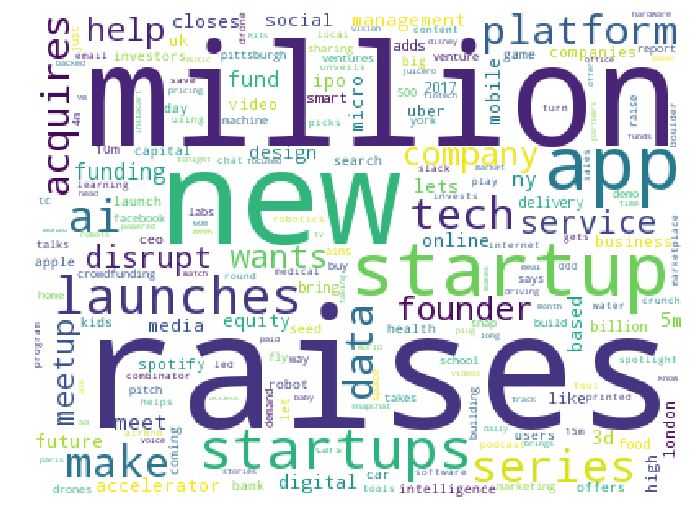

In [55]:
plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 상관 행렬 만들기 

In [56]:
tdm.todense() 

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
tdm.todense().shape # 580 x 1000인 이유는 580개 문서에서 1000개의 단어.

(580, 1000)

<img src="img/13.PNG">

matrix([[1,1, 0, 0], <br>
        [0, 0, 1, 1]], dtype=int64) 
        
- 이런 형태로 만들어 진다. 

In [79]:
np.corrcoef(tdm.todense(),rowvar=0)[0][:10] # 첫번쨰 단어와 다른 단어의 관계

array([ 1.        , -0.00567572, -0.00567572, -0.00870001, -0.0046302 ,
       -0.00567572, -0.00567572, -0.00734006, -0.0046302 , -0.0046302 ])

In [80]:
np.corrcoef(tdm.todense(),rowvar=0)[1][:10] # 두번째 단어와 다른 단어의 관계

array([-0.00567572,  1.        , -0.00519931, -0.00796975, -0.00424154,
       -0.00519931, -0.00519931, -0.00672394, -0.00424154, -0.00424154])

In [63]:
word_corr = np.corrcoef(tdm.todense(), rowvar=0)

In [64]:
word_corr

array([[ 1.        , -0.00567572, -0.00567572, ..., -0.00804763,
        -0.0046302 , -0.0046302 ],
       [-0.00567572,  1.        , -0.00519931, ..., -0.00737212,
        -0.00424154, -0.00424154],
       [-0.00567572, -0.00519931,  1.        , ..., -0.00737212,
        -0.00424154, -0.00424154],
       ..., 
       [-0.00804763, -0.00737212, -0.00737212, ...,  1.        ,
        -0.0060141 , -0.0060141 ],
       [-0.0046302 , -0.00424154, -0.00424154, ..., -0.0060141 ,
         1.        , -0.00346021],
       [-0.0046302 , -0.00424154, -0.00424154, ..., -0.0060141 ,
        -0.00346021,  1.        ]])

In [65]:
edges = []
for i in range(len(words)):
    for j in range(i+1,len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))

In [66]:
edges = sorted(edges, key=operator.itemgetter(2),reverse=True)

In [67]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

In [68]:
import networkx

In [69]:
G = networkx.Graph()

In [70]:
edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1,word2))

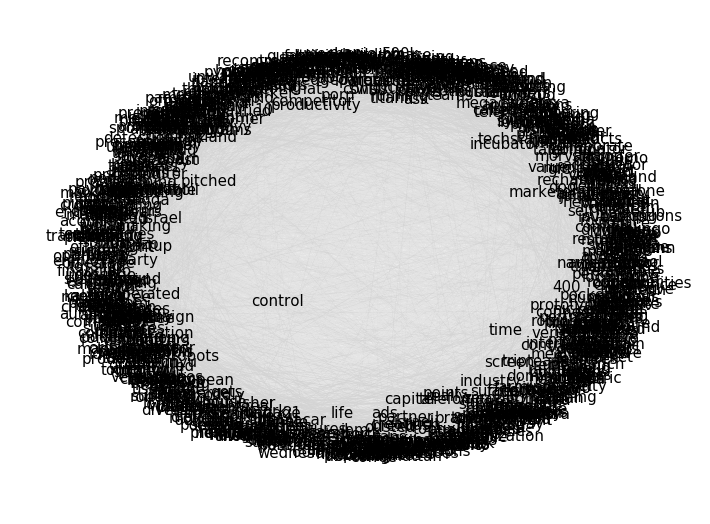

In [81]:
position = networkx.spring_layout(G, k=0.09,  iterations=100)
plt.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15)
plt.axis('off')
plt.show()